In [3]:
import tensorflow as tf
from keras.datasets import fashion_mnist

mnist = tf.keras.datasets.fashion_mnist
(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

train_img  = train_img .reshape(60000, 784)
test_img  = test_img.reshape (10000, 784)

train_img = train_img/255
test_img = test_img/255

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Dense(128, activation='relu', input_shape=(784, )),
    Dense(10, activation='softmax')])

In [5]:
from keras import optimizers

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
import timeit

tic = timeit.default_timer()
trained_model = model.fit(train_img, train_lbl, batch_size=32, epochs=50,  verbose=1, validation_data=(test_img, test_lbl))
toc = timeit.default_timer()

print('Time: ', toc - tic) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 13s 208us/step - loss: 0.4985 - acc: 0.8249 - val_loss: 0.4208 - val_acc: 0.8500
Epoch 2/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.3699 - acc: 0.8664 - val_loss: 0.3730 - val_acc: 0.8651
Epoch 3/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.3339 - acc: 0.8780 - val_loss: 0.3880 - val_acc: 0.8591
Epoch 4/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.3094 - acc: 0.8868 - val_loss: 0.3764 - val_acc: 0.8596
Epoch 5/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.2898 - acc: 0.8927 - val_loss: 0.3480 - val_acc: 0.8773
Epoch 6/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.2773 - acc: 0.8964 - val_loss: 0.3388 - val_acc: 0.8791
Epoch 7/50
60000/60

In [0]:
history = trained_model.history
acc_val = history['val_acc']
acc_tra = history['acc']

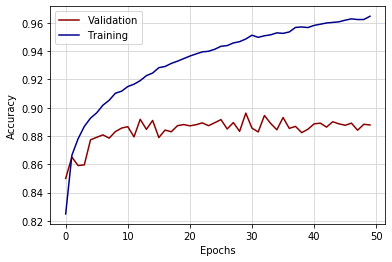

In [9]:
import matplotlib.pyplot as plt

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()